In [1]:
import sys  
sys.path.append( '..')

In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from src.stocks import *

In [4]:
# Define the stock codes you are interested in
stock_codes = ["RELIANCE.NS","TCS.NS","DABUR.NS","ADANIGREEN.NS","SOLARA.NS","ZYDUSLIFE.NS","TATAMOTORS.NS","KPIL.NS"]

# end_date = datetime.now() - timedelta(days=1)
end_date= dt.datetime(2024, 4, 10, 13, 59, 26, 964566)

start_date = end_date - dt.timedelta(days=728)
start_date, end_date

(datetime.datetime(2022, 4, 13, 13, 59, 26, 964566),
 datetime.datetime(2024, 4, 10, 13, 59, 26, 964566))

In [5]:
import pandas_market_calendars as mcal
bse = mcal.get_calendar('BSE')
dates = bse.schedule(start_date=end_date, end_date=end_date+dt.timedelta(days=1))

In [6]:
dates['market_close'].min()

Timestamp('2024-04-10 10:00:00+0000', tz='UTC')

In [7]:
generate_all_features(stock_codes, start_date, end_date,test_days=1, get_test_data=True)

generating features for  RELIANCE.NS


[*********************100%%**********************]  1 of 1 completed
/Users/ravinarukulla/PycharmProjects/stock_forecast/venv_311/lib/python3.11/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2
/Users/ravinarukulla/PycharmProjects/stock_forecast/venv_311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ravinarukulla/PycharmProjects/stock_forecast/venv_311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return 

AttributeError: 'DatetimeIndex' object has no attribute 'columns'

In [ ]:
# forecast_df

In [ ]:
data = pd.read_csv('features_TATAMOTORS.NS.csv')
# data = pd.read_csv('target_TATAMOTORS.NS.csv')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
# list(data.columns)

In [14]:
data['Date'].diff().dt.days.fillna(0)

0      0.0
1      5.0
2      1.0
3      1.0
4      1.0
      ... 
485    1.0
486    1.0
487    1.0
488    1.0
489    3.0
Name: Date, Length: 490, dtype: float64

In [11]:
def get_day_names(data,date_columns):
    data["day"]= data[date_columns].dt.day_name()
    return pd.get_dummies(data["day"])

In [12]:
get_day_names(data,date_columns='Date')

,Friday,Monday,Thursday,Tuesday,Wednesday
0,False,False,False,False,True
1,False,True,False,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,True,False,False
...,...,...,...,...,...
485,False,False,False,True,False
486,False,False,False,False,True
487,False,False,True,False,False
488,True,False,False,False,False


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1804.772, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1806.720, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1806.719, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1818.162, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1808.717, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.402 seconds


/Users/ravinarukulla/PycharmProjects/stock_forecast/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ravinarukulla/PycharmProjects/stock_forecast/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


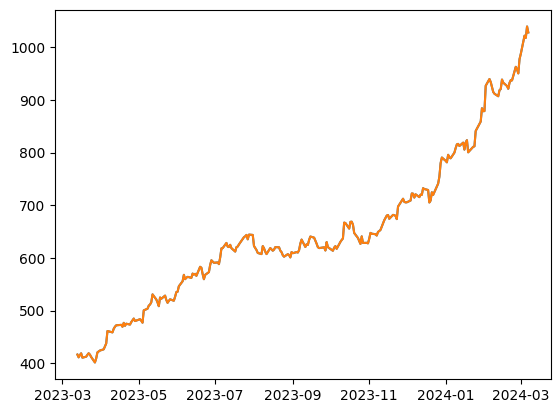

In [12]:
train = data.set_index("Date")
model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(train))
forecast = pd.DataFrame(forecast,index = train.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(train, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()